## The following code was created using the following website: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## This is LDA topic modelling

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel


# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# read in woso_test_data.csv
woso_df = pd.read_csv('data/woso_test_data_2020-2024.csv')

# read in mens_test_data.csv
mens_df = pd.read_csv('data/mens_test_data_2020-2024.csv')

In [3]:
# create two lists of clean_text data
woso_data = woso_df.clean_text.values.tolist()
mens_data = mens_df.clean_text.values.tolist()


In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

woso_words = list(sent_to_words(woso_data))
mens_words = list(sent_to_words(mens_data))

print(woso_words[:1])

[['last', 'monday', 'aston', 'villa', 'women', 'announced', 'signing', 'mana', 'iwabuchi', 'yearold', 'japan', 'international', 'world', 'cup', 'winner', 'statement', 'signing', 'club', 'first', 'season', 'wsl', 'culmination', 'process', 'id', 'working', 'since', 'summer', 'moment', 'deal', 'concluded', 'go', 'highlight', 'short', 'career', 'far', 'sporting', 'director', 'villas', 'head', 'coach', 'gemma', 'davies', 'share', 'admiration', 'respect', 'japanese', 'womens', 'football', 'players', 'past', 'present', 'fortunate', 'benefit', 'footballing', 'artistry', 'japanese', 'legends', 'playing', 'aya', 'miyama', 'st', 'louis', 'athletica', 'usa', 'yuki', 'nagasato', 'time', 'chelsea', 'players', 'like', 'mana', 'displayed', 'precision', 'grace', 'part', 'dna', 'japanese', 'womens', 'football', 'related', 'womens', 'transfer', 'window', 'january', 'every', 'deal', 'europes', 'top', 'five', 'leagues', 'first', 'tried', 'sign', 'mana', 'tokyo', 'olympics', 'postponed', 'chose', 'stay', 'j

In [5]:
# Build the bigram and trigram models
woso_bigram = gensim.models.Phrases(woso_words, min_count=5, threshold=100) # higher threshold fewer phrases.
woso_trigram = gensim.models.Phrases(woso_bigram[woso_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
woso_bigram_mod = gensim.models.phrases.Phraser(woso_bigram)
woso_trigram_mod = gensim.models.phrases.Phraser(woso_trigram)

# See trigram example
print(woso_trigram_mod[woso_bigram_mod[woso_words[0]]])

['last', 'monday', 'aston_villa_women', 'announced', 'signing', 'mana_iwabuchi', 'yearold', 'japan', 'international', 'world_cup', 'winner', 'statement', 'signing', 'club', 'first', 'season', 'wsl', 'culmination', 'process', 'id', 'working', 'since', 'summer', 'moment', 'deal', 'concluded', 'go', 'highlight', 'short', 'career', 'far', 'sporting_director', 'villas', 'head_coach', 'gemma_davies', 'share', 'admiration', 'respect', 'japanese', 'womens', 'football', 'players', 'past', 'present', 'fortunate', 'benefit', 'footballing', 'artistry', 'japanese', 'legends', 'playing', 'aya', 'miyama', 'st_louis', 'athletica', 'usa', 'yuki', 'nagasato', 'time', 'chelsea', 'players', 'like', 'mana', 'displayed', 'precision', 'grace', 'part', 'dna', 'japanese', 'womens', 'football', 'related', 'womens', 'transfer_window', 'january', 'every', 'deal', 'europes_top_five', 'leagues', 'first', 'tried', 'sign', 'mana', 'tokyo_olympics', 'postponed', 'chose', 'stay', 'japan', 'never', 'gave', 'though', 'wo

In [6]:
# Build the bigram and trigram models
mens_bigram = gensim.models.Phrases(mens_words, min_count=5, threshold=100) # higher threshold fewer phrases.
mens_trigram = gensim.models.Phrases(mens_bigram[woso_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
mens_bigram_mod = gensim.models.phrases.Phraser(mens_bigram)
mens_trigram_mod = gensim.models.phrases.Phraser(mens_trigram)

# See trigram example
print(mens_trigram_mod[mens_bigram_mod[mens_words[0]]])

['mikel_arteta', 'revealed', 'arsenals', 'priority', 'january', 'trim', 'numbers', 'squad', 'sead_kolasinac', 'one', 'several', 'players', 'barely', 'featured', 'season', 'defender', 'joined', 'schalke', 'loan', 'end', 'campaign', 'large', 'squad', 'knew', 'arteta', 'said', 'lot', 'things', 'happened', 'summer', 'cannot', 'accomplish', 'different', 'reasons', 'players', 'going', 'go', 'loan', 'going', 'leave', 'priority', 'moment', 'cannot', 'sustain', 'numbers', 'certain', 'positions', 'see', 'right', 'opportunity', 'positions', 'need', 'help', 'related', 'dele_alli', 'patson_daka', 'eight', 'players', 'could', 'move', 'january', 'mesut_zil', 'shkodran_mustafi', 'among', 'others', 'feature', 'artetas', 'plans', 'one', 'player', 'manager', 'said', 'would', 'like', 'keep', 'reiss_nelson', 'whose', 'absence', 'squad', 'recent', 'weeks', 'fuelled', 'speculation', 'could', 'verge', 'move', 'fit', 'reason', 'featuring', 'squad', 'arteta', 'said', 'muscular', 'issue', 'training', 'shame', 'f

In [7]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'gmt', 'pm'])

In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(bigram_mod, texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(trigram_mod, bigram_mod, texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
woso_words_nostops = remove_stopwords(woso_words)

# Form Bigrams
woso_words_bigrams = make_bigrams(woso_bigram_mod, woso_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
woso_data_lemmatized = lemmatization(woso_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(woso_data_lemmatized[:1])

[['last', 'woman', 'announce', 'sign', 'mana_iwabuchi', 'winner', 'statement', 'sign', 'club', 'first', 'season', 'wsl', 'culmination', 'process', 'working', 'summer', 'moment', 'deal', 'conclude', 'go', 'highlight', 'short', 'career', 'far', 'sporting_director', 'villa', 'gemma_davie', 'share', 'admiration', 'respect', 'japanese', 'women', 'football', 'player', 'present', 'fortunate', 'benefit', 'footballe', 'artistry', 'legend', 'play', 'player', 'display', 'precision', 'grace', 'japanese', 'women', 'football', 'relate', 'women', 'transfer_window', 'deal', 'europes_top', 'league', 'first', 'try', 'sign', 'tokyo_olympic', 'postpone', 'choose', 'stay', 'never', 'give', 'though', 'work', 'manas', 'european', 'agent', 'play', 'career', 'opportunity', 'come', 'conversation', 'bring', 'front', 'queue', 'know', 'compete', 'top', 'club', 'gemma', 'able', 'deliver', 'team', 'presentation', 'longterm', 'ambition', 'play', 'training', 'environment', 'fit', 'team', 'fortunately', 'great', 'conve

In [12]:
# Remove Stop Words
mens_words_nostops = remove_stopwords(mens_words)

# Form Bigrams
mens_words_bigrams = make_bigrams(mens_bigram_mod, mens_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
mens_data_lemmatized = lemmatization(mens_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(mens_data_lemmatized[:1])

[['mikel_arteta', 'reveal', 'arsenal', 'priority', 'trim', 'number', 'squad', 'sead_kolasinac', 'several', 'player', 'barely', 'feature', 'season', 'defender', 'join', 'schalke', 'loan', 'end', 'campaign', 'large', 'squad', 'know', 'arteta', 'say', 'lot', 'thing', 'happen', 'summer', 'accomplish', 'different', 'reason', 'player', 'go', 'go', 'loan', 'go', 'leave', 'priority', 'moment', 'sustain', 'number', 'certain', 'position', 'see', 'right', 'opportunity', 'position', 'need', 'help', 'relate', 'dele_alli', 'player', 'move', 'shkodran_mustafi', 'other', 'feature', 'arteta', 'plan', 'player', 'manager', 'say', 'keep', 'absence', 'squad', 'recent', 'week', 'fuel', 'speculation', 'verge', 'move', 'fit', 'reason', 'feature', 'arteta', 'say', 'muscular', 'issue', 'training', 'shame', 'feel', 'get', 'performance', 'level', 'start', 'really', 'good', 'game', 'arsenal', 'manager', 'also', 'hail', 'influence', 'bukayo_saka', 'yearold', 'come', 'fore', 'time', 'establish', 'player', 'crumple',

In [13]:
# Create Dictionary
woso_id2word = corpora.Dictionary(woso_data_lemmatized)

# Create Corpus
woso_texts = woso_data_lemmatized

# Term Document Frequency
woso_corpus = [woso_id2word.doc2bow(text) for text in woso_texts]

# View
print(woso_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 2), (38, 2), (39, 1), (40, 1), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 4), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 4), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 4), (66, 1), (67, 1), (68, 1), (69, 1), (70, 3), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 2), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 3), (94, 1), (95, 1), (96, 8), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 4), (108, 1), (109, 1), (110, 6)

In [14]:
# Create Dictionary
mens_id2word = corpora.Dictionary(mens_data_lemmatized)

# Create Corpus
mens_texts = mens_data_lemmatized

# Term Document Frequency
mens_corpus = [mens_id2word.doc2bow(text) for text in mens_texts]

# View
print(mens_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 4), (7, 8), (8, 2), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 3), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 3), (58, 4), (59, 6), (60, 3), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 3), (67, 2), (68, 3), (69, 1), (70, 1), (71, 2), (72, 1), (73, 2), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 5), (82, 1), (83, 3), (84, 2), (85, 3), (86, 1), (87, 1), (88, 1), (89, 3), (90, 2), (91, 1), (92, 2), (93, 1), (94, 1), (95, 4), (96, 1), (97, 5), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 2), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 3)

In [15]:
woso_id2word[0]

'ability'

In [16]:
mens_id2word[0]

'absence'

In [17]:
# Build LDA model
woso_lda_model = gensim.models.ldamodel.LdaModel(corpus=woso_corpus,
                                           id2word=woso_id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
# Build LDA model
mens_lda_model = gensim.models.ldamodel.LdaModel(corpus=mens_corpus,
                                           id2word=mens_id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [19]:
# Print the Keyword in the 10 topics
pprint(woso_lda_model.print_topics())
woso_doc_lda = woso_lda_model[woso_corpus]

[(0,
  '0.045*"say" + 0.022*"go" + 0.020*"s" + 0.020*"get" + 0.020*"think" + '
  '0.019*"play" + 0.017*"want" + 0.014*"ve" + 0.014*"m" + 0.014*"know"'),
 (1,
  '0.027*"compensation" + 0.003*"whistleblower" + 0.000*"bompastor" + '
  '0.000*"talented" + 0.000*"middleclass_sport" + 0.000*"hayes" + '
  '0.000*"homogenise" + 0.000*"suburban" + 0.000*"pakrin" + 0.000*"slfa"'),
 (2,
  '0.064*"women" + 0.049*"football" + 0.031*"woman" + 0.026*"player" + '
  '0.021*"sport" + 0.018*"say" + 0.016*"girl" + 0.015*"men" + 0.012*"team" + '
  '0.010*"game"'),
 (3,
  '0.054*"arsenal" + 0.035*"goal" + 0.029*"chelsea" + 0.026*"city" + '
  '0.020*"woman" + 0.012*"minute" + 0.011*"game" + 0.011*"season" + '
  '0.011*"score" + 0.010*"women"'),
 (4,
  '0.049*"canadian" + 0.025*"ireland" + 0.018*"inclusion" + 0.016*"sinclair" + '
  '0.014*"engagement" + 0.011*"charlton" + 0.011*"ladder" + 0.010*"shore" + '
  '0.010*"nonleague" + 0.010*"clarke"'),
 (5,
  '0.025*"s" + 0.022*"goal" + 0.011*"penalty" + 0.010*"lea

In [20]:
# Print the Keyword in the 10 topics
pprint(mens_lda_model.print_topics())
mens_doc_lda = mens_lda_model[mens_corpus]

[(0,
  '0.040*"min" + 0.022*"ball" + 0.021*"update" + 0.017*"get" + 0.015*"goal" + '
  '0.014*"s" + 0.014*"go" + 0.013*"right" + 0.012*"leave" + 0.012*"corner"'),
 (1,
  '0.079*"club" + 0.036*"loan" + 0.033*"deal" + 0.030*"move" + 0.024*"sign" + '
  '0.019*"owner" + 0.018*"summer" + 0.017*"also" + 0.017*"new" + '
  '0.016*"transfer"'),
 (2,
  '0.385*"arsenal" + 0.058*"arteta" + 0.035*"emirate" + 0.032*"dyche" + '
  '0.031*"mikel_arteta" + 0.024*"ramsdale" + 0.020*"southampton" + '
  '0.018*"saint" + 0.017*"saka" + 0.016*"burnley"'),
 (3,
  '0.000*"ble" + 0.000*"vocational" + 0.000*"mllere" + 0.000*"highpowered" + '
  '0.000*"grandiosity" + 0.000*"goater" + 0.000*"exceptionalist" + '
  '0.000*"drivel" + 0.000*"cre" + 0.000*"bracing"'),
 (4,
  '0.063*"goal" + 0.046*"brentford" + 0.042*"update" + 0.034*"forest" + '
  '0.024*"championship" + 0.018*"blackburn" + 0.018*"bournemouth" + '
  '0.017*"relate" + 0.017*"league" + 0.015*"sunderland"'),
 (5,
  '0.025*"football" + 0.021*"club" + 0.020

In [21]:
# Compute Perplexity
print('\nPerplexity: ', woso_lda_model.log_perplexity(woso_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=woso_lda_model, texts=woso_data_lemmatized, dictionary=woso_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.138288123957311

Coherence Score:  0.4233757892471715


In [22]:
# Compute Perplexity
print('\nPerplexity: ', mens_lda_model.log_perplexity(mens_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=mens_lda_model, texts=mens_data_lemmatized, dictionary=mens_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.510327079475392

Coherence Score:  0.44357366569091283


In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
woso_vis = pyLDAvis.gensim.prepare(woso_lda_model, woso_corpus, woso_id2word)
woso_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.297422  0.019688       1        1  16.901706
9      0.292798 -0.190744       2        1  15.110547
10     0.294399 -0.010234       3        1  13.694839
8      0.247945 -0.012591       4        1  13.524372
19     0.290010 -0.069906       5        1  10.423156
12     0.227569  0.150486       6        1   8.314438
5      0.213372 -0.192184       7        1   5.798164
18     0.185722  0.123238       8        1   5.744324
3      0.208270 -0.208058       9        1   3.918022
2      0.157386  0.245698      10        1   3.248022
11     0.153884  0.241767      11        1   3.093906
4     -0.283106 -0.014290      12        1   0.141906
13    -0.289070 -0.013247      13        1   0.065295
17    -0.285748 -0.010135      14        1   0.006886
15    -0.285514 -0.010047      15        1   0.005412
1     -0.285776 -0.010148      16        1   0.004560
6     -0.285256 -0.009953      17        1   0.002535
7     -0.284770 -0.009780      18        1   0.000643
14    -0.284770 -0.009780      19        1   0.000638
16    -0.284770 -0.009780      20        1   0.000628, topic_info=          Term          Freq         Total Category  logprob  loglift
1852       min  14824.000000  14824.000000  Default  30.0000  30.0000
226        say  25739.000000  25739.000000  Default  29.0000  29.0000
292      women  10381.000000  10381.000000  Default  28.0000  28.0000
96    football  18375.000000  18375.000000  Default  27.0000  27.0000
114       goal  14792.000000  14792.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
25         big      0.000263   5705.945222  Topic20 -10.8574  -4.9153
26        blur      0.000263     17.687495  Topic20 -10.8574   0.8611
27        bond      0.000263     71.924998  Topic20 -10.8574  -0.5417
28       boost      0.000263    236.889901  Topic20 -10.8574  -1.7337
29       brand      0.000263    356.923171  Topic20 -10.8574  -2.1436

[1350 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         3  0.478853    ability
0         5  0.037063    ability
0         6  0.340979    ability
0         7  0.127496    ability
0         9  0.013343    ability
...     ...       ...        ...
3241      2  0.044606  yesterday
3241      4  0.761182  yesterday
3241      5  0.194252  yesterday
6921      2  0.986798      yield
6805      9  0.999274      zelem

[2410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 11, 9, 20, 13, 6, 19, 4, 3, 12, 5, 14, 18, 16, 2, 7, 8, 15, 17])

In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
mens_vis = pyLDAvis.gensim.prepare(mens_lda_model, mens_corpus, mens_id2word)
mens_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.265067  0.154268       1        1  21.625230
11    -0.281672 -0.039230       2        1  16.281561
6     -0.262085  0.161129       3        1  12.824830
16    -0.236150 -0.084716       4        1  10.396925
18    -0.237418 -0.045120       5        1   9.315189
10    -0.241077  0.011488       6        1   8.338579
5     -0.211034 -0.167576       7        1   7.848558
7     -0.206824  0.110595       8        1   4.496735
12    -0.127283 -0.207550       9        1   2.493411
1     -0.071747 -0.240601      10        1   1.890976
4     -0.082974  0.270172      11        1   1.643209
17     0.169409  0.052501      12        1   0.624050
14     0.203671  0.044825      13        1   0.577806
2      0.199175  0.032291      14        1   0.543246
9      0.231616  0.001971      15        1   0.479708
13     0.221429 -0.023908      16        1   0.370378
15     0.267132 -0.005030      17        1   0.188604
19     0.306060 -0.010264      18        1   0.057703
8      0.312320 -0.007632      19        1   0.002857
3      0.312519 -0.007615      20        1   0.000446, topic_info=             Term          Freq         Total Category  logprob  loglift
601          goal  57509.000000  57509.000000  Default  30.0000  30.0000
19           city  22977.000000  22977.000000  Default  29.0000  29.0000
21           club  41540.000000  41540.000000  Default  28.0000  28.0000
1471       update  33120.000000  33120.000000  Default  27.0000  27.0000
1267          min  56213.000000  56213.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
25    complicated      0.000313    365.750759  Topic20 -11.4255  -1.6500
26      concerned      0.000313    531.997765  Topic20 -11.4255  -2.0247
27      confident      0.000313   1289.786849  Topic20 -11.4255  -2.9103
28       continue      0.000313   6619.983761  Topic20 -11.4255  -4.5459
29        courage      0.000313    243.446656  Topic20 -11.4255  -1.2429

[1279 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         2  0.077291    absence
0         3  0.491730    absence
0         4  0.153249    absence
0         5  0.219213    absence
0         7  0.057302    absence
...     ...       ...        ...
2810      2  0.955854  youve_got
1497      1  0.201092     zidane
1497      6  0.261420     zidane
1497     16  0.522840     zidane
6154     12  0.994891  zinchenko

[2809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 12, 7, 17, 19, 11, 6, 8, 13, 2, 5, 18, 15, 3, 10, 14, 16, 20, 9, 4])

In [25]:
mallet_path = '/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

: 

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=6):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Call the function with the appropriate arguments
model_list, coherence_values = compute_coherence_values(dictionary=woso_id2word, corpus=woso_corpus, texts=woso_data_lemmatized, start=2, limit=40, step=6)


In [ ]:
# Can take a long time to run.
mens_model_list, mens_coherence_values = compute_coherence_values(dictionary=mens_id2word, corpus=mens_corpus, texts=mens_data_lemmatized, start=2, limit=40, step=6)

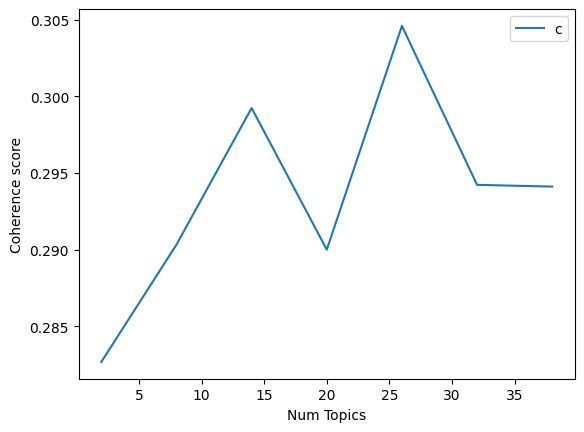

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2827
Num Topics = 8  has Coherence Value of 0.2903
Num Topics = 14  has Coherence Value of 0.2992
Num Topics = 20  has Coherence Value of 0.29
Num Topics = 26  has Coherence Value of 0.3046
Num Topics = 32  has Coherence Value of 0.2942
Num Topics = 38  has Coherence Value of 0.2941


In [ ]:
# Print the coherence scores
for m, cv in zip(x, mens_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.284
Num Topics = 8  has Coherence Value of 0.2593
Num Topics = 14  has Coherence Value of 0.2596
Num Topics = 20  has Coherence Value of 0.2635
Num Topics = 26  has Coherence Value of 0.2642
Num Topics = 32  has Coherence Value of 0.2674
Num Topics = 38  has Coherence Value of 0.2674
